# Questão 5, item b

# Introdução.

&nbsp;

Usaremos aprendizagem de máquina (machine learning) afim de criarmos um modelo para ser usado no seguinte problema: Dado as atributos médicos de um determinado indíviduo, esse indíviduo tem ou não doença cardíaca?

Dessa forma, nos utilizaremos do paradigma de *aprendizado de máquina supervisionado* (quando temos dados estruturados que serão usados pelo modelo para a aprendizagem) afim de classificar um determinado indíviduo como doente cardíaco ou não doente cardíaco. O modelo de treinamento a ser usado será o modelo de *Regressão Logística*.

&nbsp;

**Informações gerais sobre os dados:**

1. Idade - Em anos
2. Sexo 
  * 0 = Mulher
  * 1 = Homem
3. TDP - Tipo de dor no peito
  * 1 = Angina típica
  * 2 = Angina atípica
  * 3 = Dor Não anginosa
  * 4 = Assintomático
4. PAR - Pressão arterial em repouso
5. COL = Colesterol em mg/dl
6. ASJ - Açúcar no sangue em jejum (120 mg/dl)
  * 1 = Verdadeiro
  * 2 = Falso
7. RER - Resultado eletromagnético em repouso
  * 0 = Normal
  * 1 = Anormalidade
  * 2 = Hipertrofia versticular esquerda provável ou definitiva
8. FCMA - Frequência cardíaca Máxima alcançada
9. AIE - Angina introduzida por exercício
  * 0 = Não
  * 1 = Sim
10. DSTIRR - Depressão ST induzida por exercício em relação ao repouso
11. ISST - Inclinação do segmento ST de pico do exercício
12. NVP - Número de vasos principais
13. THAL
  * 3 = Normal
  * 6 = Defeito corrigido
  * 7 = Defeito reversível
14. DDC - Diagnóstico de doença cardíaca - Status da doença angiográfica
  * 0 = Estreitamento do Diâmetro < 50% - Não tem doença cardíaca
  * 1 = Estreitamento do Diâmetro > 50% - Tem doença cardíaca

# Livrarias Python necessárias para a execução do projeto.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importando a base de dados

In [2]:
url_dados = 'https://raw.githubusercontent.com/lucasalustiano/ea-prova-resolucoes/master/questao_5/heart-disease.csv?token=AJRNIHYPU2QYFL2HBWSBJYLBOHV6E'

base_dados = pd.read_csv(url_dados)
base_dados

,idade,sexo,TDP,PAR,COL,ASJ,RER,FCMA,AIE,DSTIRR,ISST,NVP,THAL,DDC
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Análise de dados exploratória

&nbsp;

Correlação entre cada um dos atributos. A frequência cardíaca máxima alcançada e os tipos de dores no peito são os atributos de maior relação entre os indíviduos acometidos de doença cardíaca.


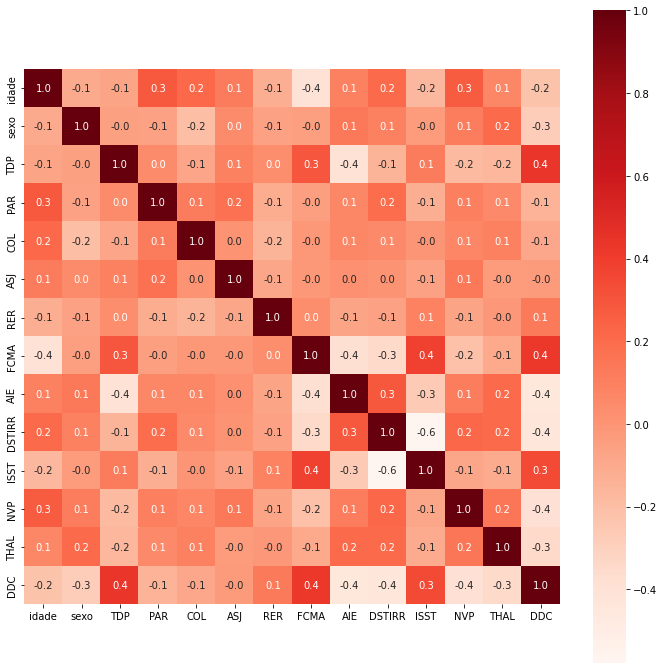

In [3]:
corr = base_dados.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, cmap='Reds')

# Análise de dados exploratória

&nbsp;

Número de doentes cardíacos (1) e não doentes cardíacos (0). Dos nossos 303 indivíduos, mais da metade tem doença cardíaca.


([<matplotlib.axis.XTick at 0x7ff30c9917d0>,
 [Text(0, 0, 'Não doentes cardícaos'), Text(0, 0, 'Doentes cardíacos')])

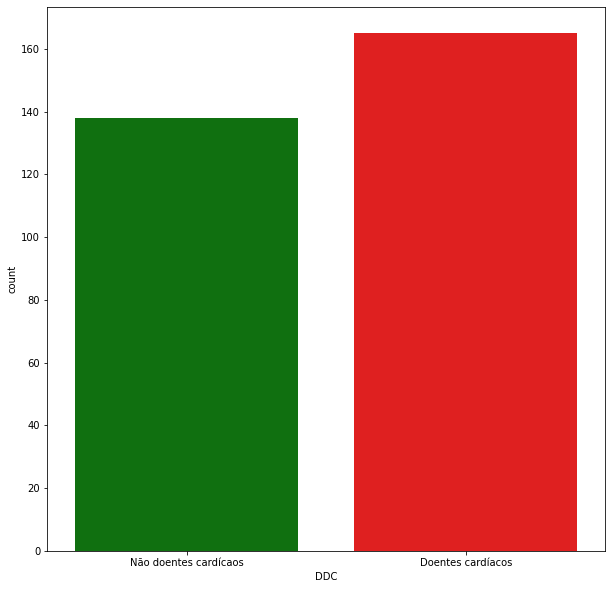

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(x="DDC", data=base_dados, palette=['green', 'red'])
plt.xticks(ticks = [0, 1], labels = ['Não doentes cardícaos', 'Doentes cardíacos'])

# Análise de dados exploratória

&nbsp;

Disperção do número de casos de doença cardíaca em relação a **idade** e a **frequência cardíaca máxima**. É perceptível um maior aglomerado de número de casos de doentes cardíacos na faixa dos 40-60 anos, em especial com frequência cardíaca acima de 150 bps. Já entre os não doentes, o aglomerado se encontra entre a faixa dos 50-70 anos e com frequância cardíaca abaixo dos 150 bps.


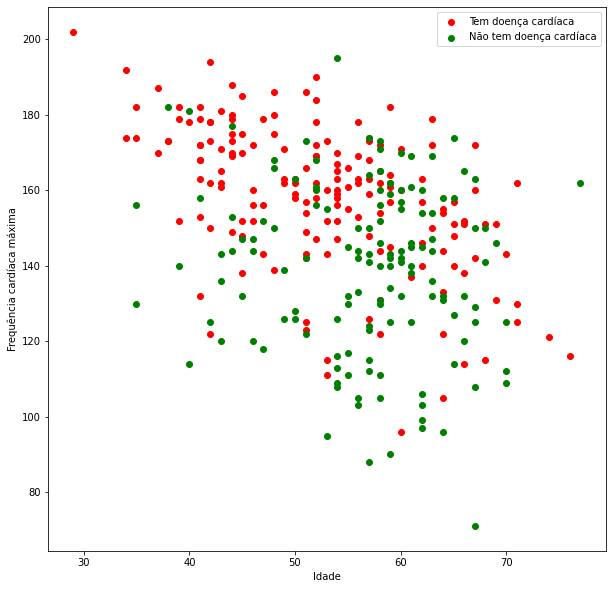

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(x=base_dados.idade[base_dados.DDC == 1], y=base_dados.FCMA[base_dados.DDC == 1], c='red')
plt.scatter(x=base_dados.idade[base_dados.DDC == 0], y=base_dados.FCMA[base_dados.DDC == 0], c='green')
plt.xlabel('Idade')
plt.ylabel('Frequência cardíaca máxima')
plt.legend(['Tem doença cardíaca', 'Não tem doença cardíaca'])

# Análise de dados exploratória

&nbsp;

Número de doentes cardíacos em relação ao sexo. Proporcionalmente falando, é possível supor que mulheres tendem a ter doença cardíaca mais do que homens, porém, há mais exemplares de homens do que mulheres na base de dados.

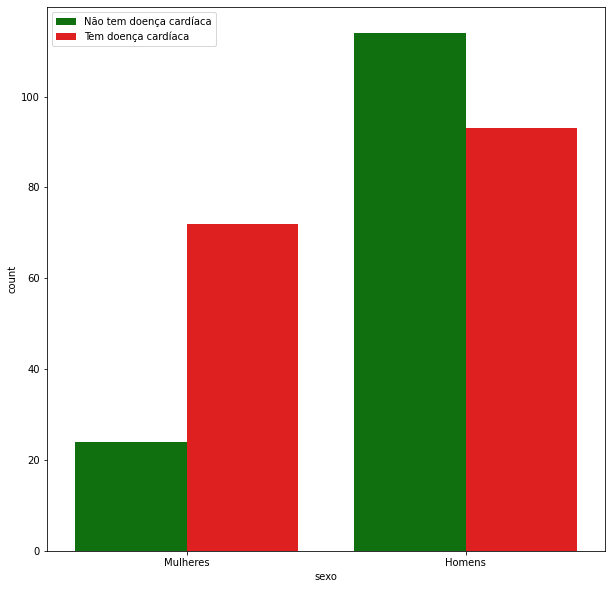

In [6]:
plt.figure(figsize=(10, 10))
sns.countplot(data=base_dados, x='sexo', hue='DDC', palette=['green', 'red'])
plt.xticks(ticks = [0, 1], labels = ['Mulheres', 'Homens'])
plt.legend(["Não tem doença cardíaca", 'Tem doença cardíaca'])

# Preparação dos dados

&nbsp;

Feitas as observações e inferências a cerca dos dados, agora iremos dívidi-los em dois conjuntos: X e Y. O conjunto X será o conjunto de variáveis independentes (idade, sexo, colesterol, etc) e o conjunto Y será o conjunto da variável categórica *DDC* (Tem doença cardíaca ou não). 

&nbsp;

Dos conjunto X e Y ainda diviremos ambos em mais dois subconjuntos, um para treino do modelo e outro para teste do modelo, de forma que, teremos um subconjunto X para treino e outro para teste e teremos um subconjunto Y para treino e outro para teste do modelo. Usaremos 20% dos dados totais para teste (test_size = 0.2).

In [7]:
X = base_dados.drop(['DDC'], axis=1) 
y = base_dados['DDC'] 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Criando o modelo de regressão logística

&nbsp;

Abaixo estamos criando um modelo de **regressão logistíca** e logo em seguida estabelecemos o subconjunto de treino (X_train) e o subconjunto de teste (Y_test) para treino do modelo. 

In [9]:
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Predição com o subconjunto de teste

&nbsp;

Submetamos o modelo ao teste de predição utilizando os subconjuntos de teste afim de comparar o resultado das predições do modelo com os diagnósticos reais e obtermos uma taxa de precisão das predições do modelo.

In [10]:
test_pred = modelo.predict(X_test)
test_preci = accuracy_score(test_pred, y_test) 

print("Precisão do modelo:", test_preci)

Precisão do modelo: 0.9016393442622951


Assim, nosso modelo obteve aproximadamente 90% de precisão em suas predições.

# Conclusão

&nbsp;

Conseguimos criar um modelo de aprendizagem de máquina que utiliza regressão logística que conseguiu classificar com 90% de precisão se um determinado indíviduo tem ou não alguma doença cardíaca, baseado nos atributos médicos do indíviduo em questão.

&nbsp;

O modelo em si é bem simplista visto que quase não foi ajustado, ou seja, quase não houveram parâmetros personalizado de modo que fosse melhor adequado para observar os dados de forma a obter ainda mais precisão nas predições. Porém, isso é perfeitamente possível de ser feito.

&nbsp;

A base de dados é pobre para realização de predições reais, no sentido que tem apenas 303 exemplares onde ainda assim, desses 303 tivemos que subdivídi-los em subconjuntos de treino e teste para o modelo.

&nbsp;

De forma geral, o modelo seria ainda mais confiável se fosse treinado com uma base de dados maior e fosse devidamente ajustado, porém fugiria do escopo da questão da atividade.